# Risk Management

In [1]:
import statsmodels.api as sm
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

#### Number of assets and simulations conducted

In [2]:
n_assets = 5
n_simulation = 500

#### Generating random samples from normal distribution used as returns

In [3]:
returns = np.random.randn(n_assets, n_simulation)

#### Generating random number to calculate weights and creating a function to calculate expected portfolio return and portfolio standard deviation

In [4]:
rand = np.random.rand(n_assets)
weights = rand/sum(rand)

def port_return(returns):
    rets = np.mean(returns, axis = 1)
    cov = np.cov(rets.T, aweights = weights, ddof = 1)
    portfolio_returns = np.dot(weights, rets.T)
    portfolio_sd = np.sqrt(np.dot(weights, np.dot(cov, weights)))
    return portfolio_returns, portfolio_sd

#### Calling the result of the function and printing the results

In [5]:
portfolio_returns, portfolio_sd = port_return(returns)
print('Portfolio Returns:', portfolio_returns)
print('Returns Standard Deviation:', portfolio_sd)

Portfolio Returns: 0.020812700022154882
Returns Standard Deviation: 0.01714759728402952


#### Rerunning the function 100 times.

In [6]:
portfolio = np.array([port_return(np.random.randn(n_assets, i))
                     for i in range(1, 101)])

#### Running linear regression to fit best fit line

In [7]:
best_fit = sm.OLS(portfolio[:, 1], sm.add_constant(portfolio[:, 0])).fit().fittedvalues

#### Creating interactive plot for visualization purposes

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(name = 'Risk-Return Relationship',
                        x = portfolio[:, 0],
                        y = portfolio[:, 1],
                        mode = 'markers'))
fig.add_trace(go.Scatter(name = 'Best Fit Line',
                        x = portfolio[:, 0],
                        y = best_fit, mode = 'lines'))
fig.update_layout(xaxis_title = 'Return',
                 yaxis_title = 'Standard Deviation',
                 width = 900, height = 470)
fig.show()

# Adverse Selection Model

#### Writing function for risk-averse utility function

In [9]:
def utility(x):
    return(np.exp(x ** gamma))

#### Generating random samples from a uniform distribution

In [10]:
pi = np.random.uniform(0, 1, 20)
pi = np.sort(pi)

#### Printing the 3 highest loss probabilities

In [11]:
print('The highest three probability of losses are {}'.format(pi[-3:]))

The highest three probability of losses are [0.79819787 0.96456639 0.98863102]


In [12]:
y = 2
c = 1.5
Q = 5
D = 0.01
gamma = 0.4

#### Writing a function for supply and demand of insurance contracts

In [13]:
def supply(Q):
    return(np.mean(pi[-Q:]) * c)

In [14]:
def demand(D):
    return(np.sum(utility(y - D) > pi * utility(y - c) + (1 - pi) * utility(y)))

#### Creating plot for adverse selection for insurance

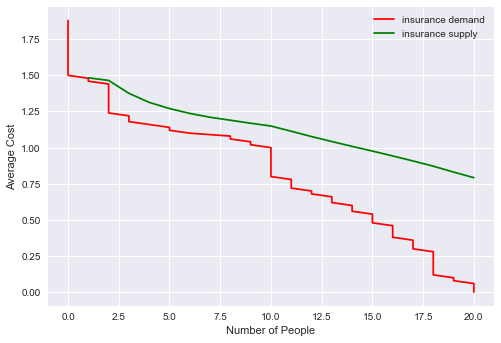

In [15]:
plt.figure()
plt.plot([demand(i) for i in np.arange(0, 1.9, 0.02)],
        np.arange(0, 1.9, 0.02),
        'r', label = 'insurance demand')
plt.plot(range(1, 21), [supply(j) for j in range(1,21)],
        'g', label = 'insurance supply')
plt.ylabel("Average Cost")
plt.xlabel("Number of People")
plt.legend()
plt.show()

# Time Series Modeling

In [16]:
import quandl

In [17]:
oil = quandl.get("NSE/OIL", authtoken = "jHKTmxyVpyJzSZvtdZuN",
                start_date = "1980-01-01",
                end_date = "2020-01-01")

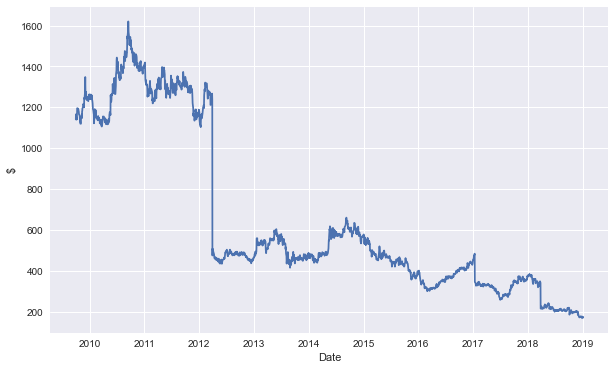

In [18]:
plt.figure(figsize = (10,6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

In [19]:
import yfinance as yf
import pandas as pd
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

### Time series for S&P 500

In [76]:
ticker = '^GSPC' # ticker of S&P 500
start = datetime.datetime(2015, 1, 1) # start date
end = datetime.datetime(2021, 1, 1) # end date
SP_prices = yf.download(ticker, start = start, end = end, interval = '1mo').Close

[*********************100%***********************]  1 of 1 completed


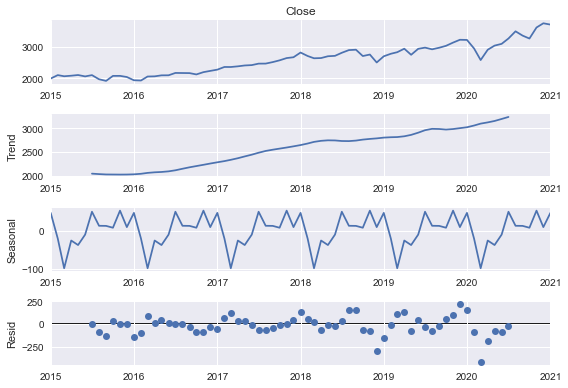

In [21]:
seasonal_decompose(SP_prices, period = 12).plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

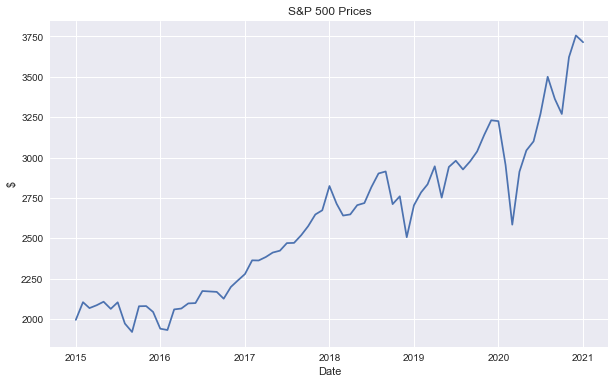

In [22]:
plt.figure(figsize = (10, 6))
plt.plot(SP_prices)
plt.title('S&P 500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show

## Autocorrelation function

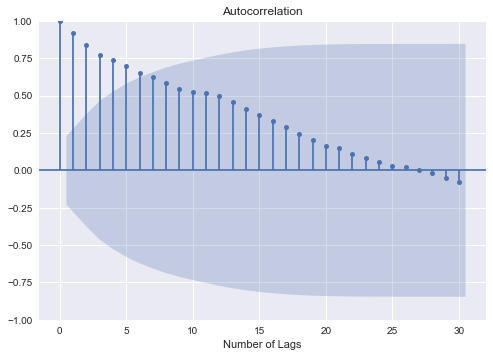

In [23]:
# plotting ACF
sm.graphics.tsa.plot_acf(SP_prices, lags = 30)
plt.xlabel('Number of Lags')
plt.show()

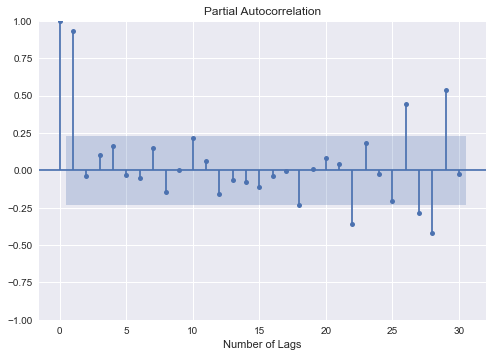

In [24]:
# plotting PACF
sm.graphics.tsa.plot_pacf(SP_prices, lags = 30)
plt.xlabel('Number of Lags')
plt.show()

## Seasonality effect

In [25]:
from fredapi import Fred
fred = Fred(api_key = 'd8f6872847f001e801e5ec7830710ca5')
energy = fred.get_series("CAPUTLG2211A2S", observation_start = "2010-01-01", observation_end = "2021-12-31")

In [26]:
energy.head()

2010-01-01    83.7028
2010-02-01    84.9324
2010-03-01    82.0379
2010-04-01    79.5073
2010-05-01    82.8055
dtype: float64

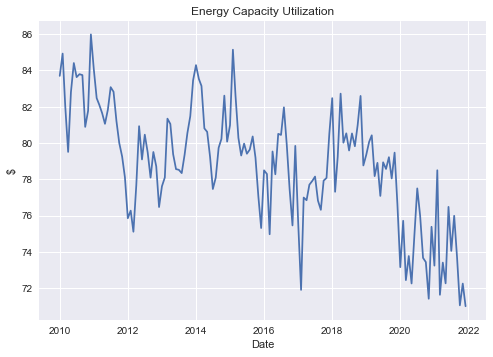

In [27]:
# plot for seasonal energy capacity utilization
plt.plot(energy)
plt.title('Energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

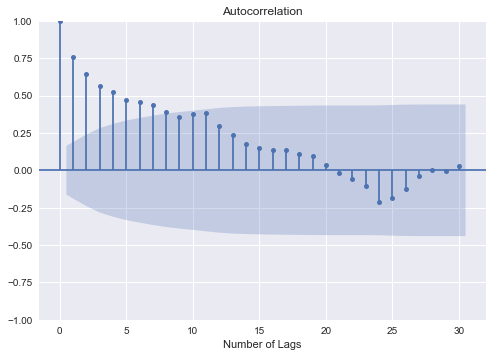

In [28]:
sm.graphics.tsa.plot_acf(energy, lags = 30)
plt.xlabel('Number of Lags')
plt.show()

#### Stationarity means that statistical properties such as mean, variance, and covariance of the time series do not change over time.

In [29]:
# augmented Dickey-Fuller test
stat_test = adfuller(SP_prices)[0:2]
print('The test statistic and p-value for the ADF test: {}'.format(stat_test))

The test statistic and p-value for the ADF test: (-0.1397254433057959, 0.9453351406233197)


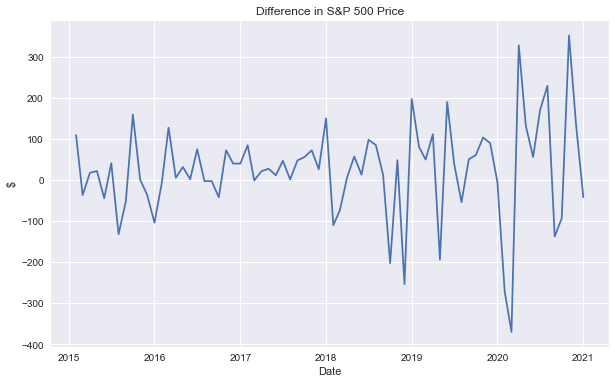

In [30]:
diff_SP_price = SP_prices.diff() # taking the difference of S&P 500 prices
plt.figure(figsize = (10, 6))
plt.plot(diff_SP_price)
plt.title('Difference in S&P 500 Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

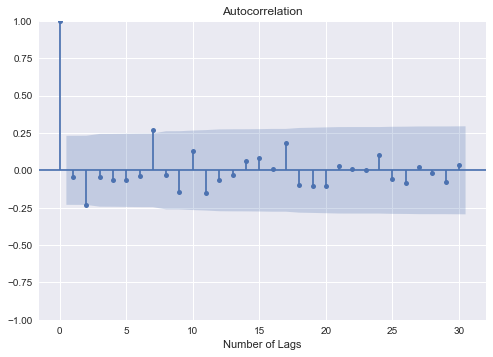

In [31]:
sm.graphics.tsa.plot_acf(diff_SP_price.dropna(), lags = 30)
plt.xlabel('Number of Lags')
plt.show()

In [32]:
stat_test2 = adfuller(diff_SP_price.dropna())[0:2] # ADF test result based on difference S&P 500 data
print("The test statistic and p-value of the ADF test after differencing are {}".format(stat_test2))

The test statistic and p-value of the ADF test after differencing are (-7.49863848608277, 4.312147752896876e-11)


### Seasonal index = (Value of a Seasonal Time Series)/(Seasonal Average) which gives a deseasonalized time series.

In [33]:
seasonal_index = energy.resample('Q').mean() # calculating quarterly mean of energy utilization
dates = energy.index.year.unique()
deseasonalized = []
for i in dates:
    for j in range(1, 13):
        deseasonalized.append((energy[str(i)][energy[str(i)].index.month == j])) #computing the numerator of Seasonal Index Formula
concat_deseasonalized = np.concatenate(deseasonalized) #concatenating the deseasonalized energy utilization

In [34]:
deseason_energy = []
for i, s in zip(range(0, len(energy), 3), range(len(seasonal_index))):
    deseason_energy.append(concat_deseasonalized[i: i + 3])
    seasonal_index.iloc[s] # computing the seasonal index using the predefined formula
concat_deseason_energy = np.concatenate(deseason_energy)
deseason_energy = pd.DataFrame(concat_deseason_energy, index = energy.index)
deseason_energy.columns = ['Deseasonalized Energy']
deseason_energy.head()
    

Deseasonalized Energy
2010-01-01                83.7028
2010-02-01                84.9324
2010-03-01                82.0379
2010-04-01                79.5073
2010-05-01                82.8055

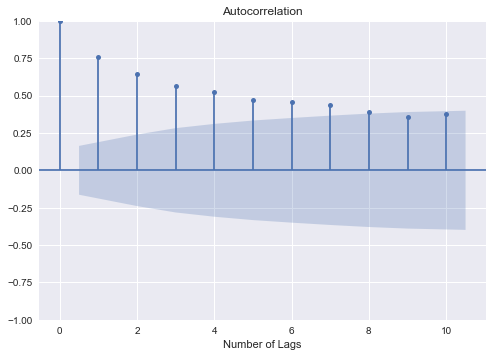

In [35]:
sm.graphics.tsa.plot_acf(deseason_energy, lags = 10)
plt.xlabel('Number of Lags')
plt.show()

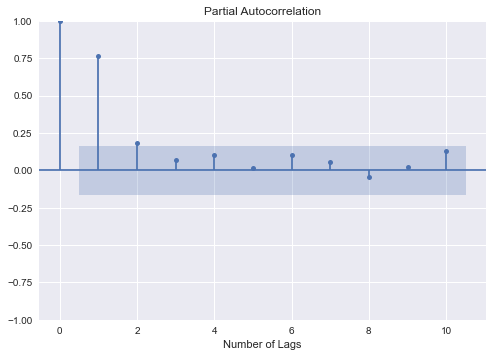

In [36]:
sm.graphics.tsa.plot_pacf(deseason_energy, lags = 10)
plt.xlabel('Number of Lags')
plt.show()

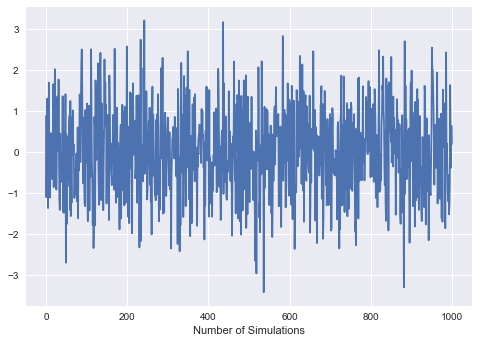

In [37]:
# white noise
mu = 0
sigma = 1
WN = np.random.normal(mu, sigma, 1000)

plt.plot(WN)
plt.xlabel('Number of Simulations')
plt.show()

## Moving Average Model

In [77]:
ticker = ['AAPL', 'MSFT', 'TSLA', 'SBUX']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2022, 1, 1)
# Retrrieving monthly closing stock prices
stock_prices = yf.download(ticker, start, end, interval = '1d').Close

[*********************100%***********************]  4 of 4 completed


In [78]:
stock_prices = stock_prices.dropna()
for i in ticker:
    stat_test = adfuller(stock_prices[i])[0:2]
    print("The ADF test statistic and p-value of {} are {}".format(i, stat_test))

The ADF test statistic and p-value of AAPL are (0.13433597344425505, 0.9683286771388521)
The ADF test statistic and p-value of MSFT are (0.4411416773947858, 0.9829699834390634)
The ADF test statistic and p-value of TSLA are (0.30321723426498587, 0.977491610612084)
The ADF test statistic and p-value of SBUX are (-1.2855432130533357, 0.6357600856360913)


In [79]:
diff_stock_prices = stock_prices.diff().dropna()
split = int(len(diff_stock_prices['AAPL'].values) * 0.95) # splitting data as 95% and 5%

diff_train_aapl = diff_stock_prices['AAPL'].iloc[:split] # assigning train set
diff_test_aapl = diff_stock_prices['AAPL'].iloc[split:] # assigning test set

diff_train_msft = diff_stock_prices['MSFT'].iloc[:split]
diff_test_msft = diff_stock_prices['MSFT'].iloc[split:]

diff_train_tsla = diff_stock_prices['TSLA'].iloc[:split]
diff_test_tsla = diff_stock_prices['TSLA'].iloc[split:]

diff_train_sbux = diff_stock_prices['SBUX'].iloc[:split]
diff_test_sbux = diff_stock_prices['SBUX'].iloc[split:]

In [41]:
# Saving the data to csv

#diff_train_aapl.to_csv('diff_train_aapl.csv')
#diff_test_aapl.to_csv('diff_test_aapl.csv')

#diff_train_msft.to_csv('diff_train_msft.csv')
#diff_test_msft.to_csv('diff_test_msft.csv')

#diff_train_tsla.to_csv('diff_train_tsla.csv')
#diff_test_tsla.to_csv('diff_test_tsla.csv')

#diff_train_sbux.to_csv('diff_train_sbux.csv')
#diff_test_sbux.to_csv('diff_test_sbux.csv')

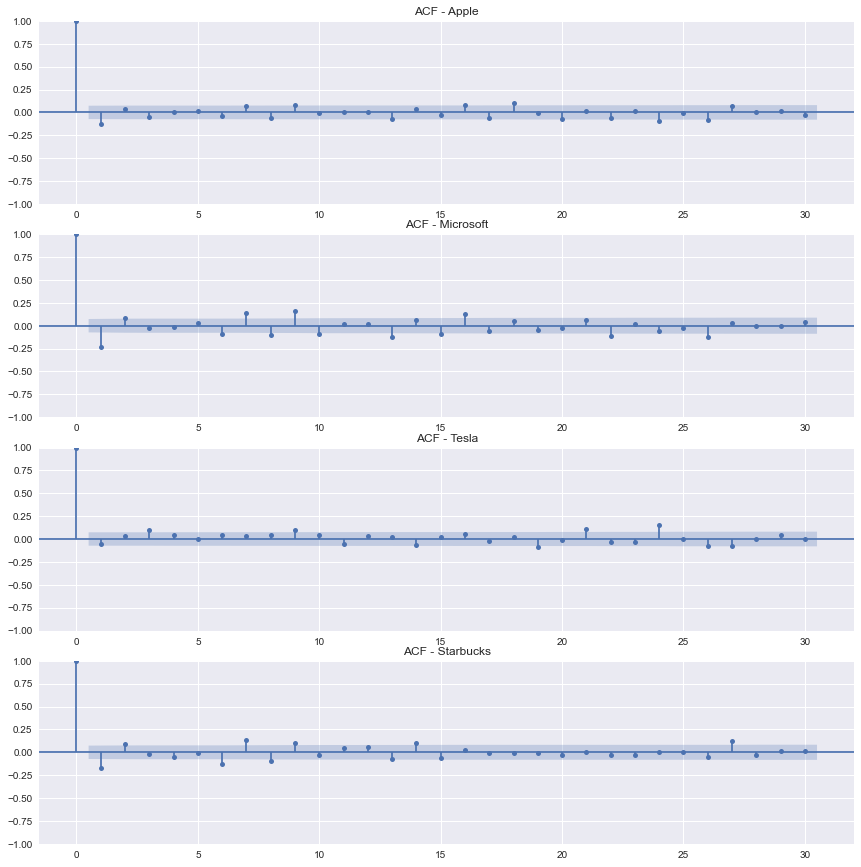

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (12, 12))
plt.tight_layout()

sm.graphics.tsa.plot_acf(diff_train_aapl, lags = 30, ax = ax1, title = 'ACF - Apple')
sm.graphics.tsa.plot_acf(diff_train_msft, lags = 30, ax = ax2, title = 'ACF - Microsoft')
sm.graphics.tsa.plot_acf(diff_train_tsla, lags = 30, ax = ax3, title = 'ACF - Tesla')
sm.graphics.tsa.plot_acf(diff_train_sbux, lags = 30, ax = ax4, title = 'ACF - Starbucks')
plt.show()

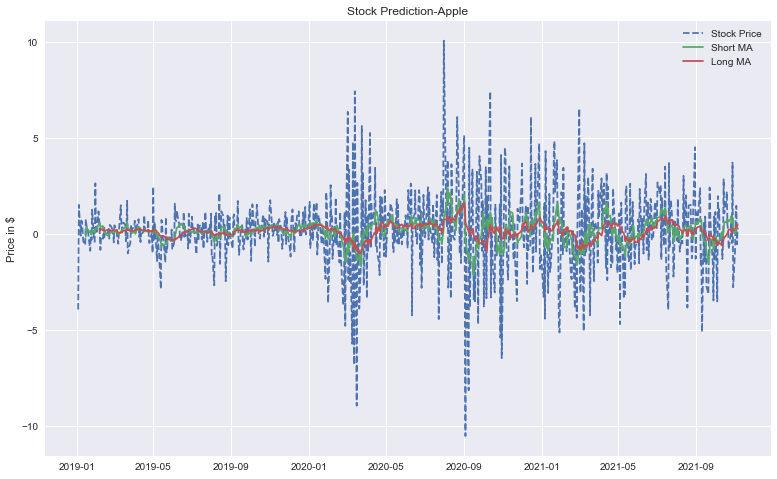

In [43]:
# apple moving average
short_moving_average_aapl = diff_train_aapl.rolling(window = 9).mean() # moving average with short window
long_moving_average_aapl = diff_train_aapl.rolling(window = 24).mean() # moving average with long window

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(diff_train_aapl.loc[start:end].index, diff_train_aapl.loc[start:end],
       label = 'Stock Price', linestyle = '--') # line plot of first differenced Apple stock prices
ax.plot(short_moving_average_aapl.loc[start:end].index, short_moving_average_aapl.loc[start:end],
       label = 'Short MA', linestyle = 'solid') # visualization for short ma
ax.plot(long_moving_average_aapl.loc[start:end].index, long_moving_average_aapl.loc[start:end],
       label = 'Long MA', linestyle = 'solid') # visualization for long ma
ax.legend(loc = 'best')
ax.set_ylabel('Price in $')
ax.set_title('Stock Prediction-Apple')
plt.show()

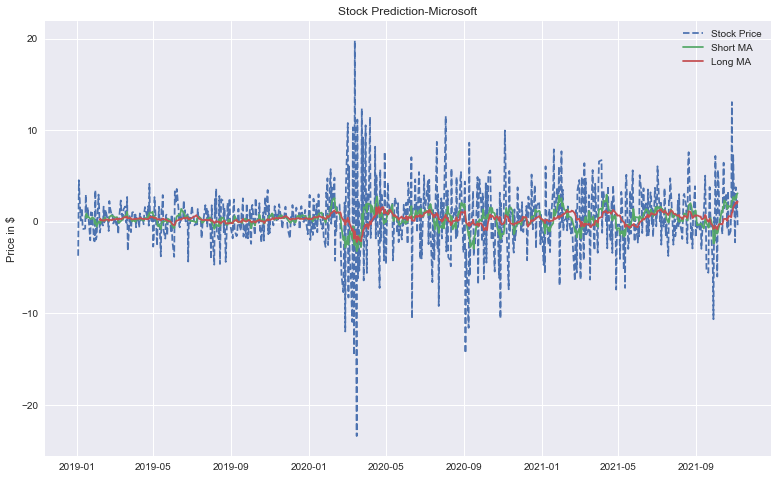

In [44]:
# microsoft moving average
short_moving_average_msft = diff_train_msft.rolling(window = 9).mean() # moving average with short window
long_moving_average_msft = diff_train_msft.rolling(window = 24).mean() # moving average with long window

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(diff_train_msft.loc[start:end].index, diff_train_msft.loc[start:end],
       label = 'Stock Price', linestyle = '--') # line plot of first differenced Apple stock prices
ax.plot(short_moving_average_msft.loc[start:end].index, short_moving_average_msft.loc[start:end],
       label = 'Short MA', linestyle = 'solid') # visualization for short ma
ax.plot(long_moving_average_msft.loc[start:end].index, long_moving_average_msft.loc[start:end],
       label = 'Long MA', linestyle = 'solid') # visualization for long ma
ax.legend(loc = 'best')
ax.set_ylabel('Price in $')
ax.set_title('Stock Prediction-Microsoft')
plt.show()

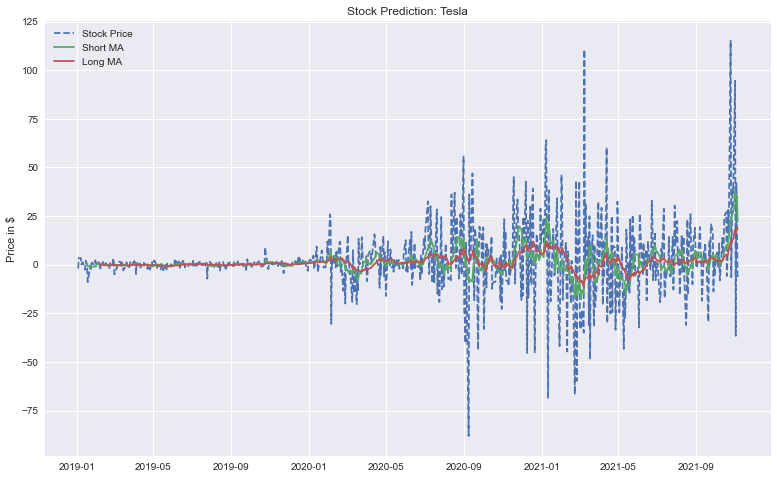

In [45]:
# tesla moving average
short_moving_average_tsla = diff_train_tsla.rolling(window = 9).mean() # moving average with short window
long_moving_average_tsla = diff_train_tsla.rolling(window = 24).mean() # moving average with long window

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(diff_train_tsla.loc[start:end].index, diff_train_tsla.loc[start:end],
       label = 'Stock Price', linestyle = '--') # line plot of first differenced Apple stock prices
ax.plot(short_moving_average_tsla.loc[start:end].index, short_moving_average_tsla.loc[start:end],
       label = 'Short MA', linestyle = 'solid') # visualization for short ma
ax.plot(long_moving_average_tsla.loc[start:end].index, long_moving_average_tsla.loc[start:end],
       label = 'Long MA', linestyle = 'solid') # visualization for long ma
ax.legend(loc = 'best')
ax.set_ylabel('Price in $')
ax.set_title('Stock Prediction: Tesla')
plt.show()

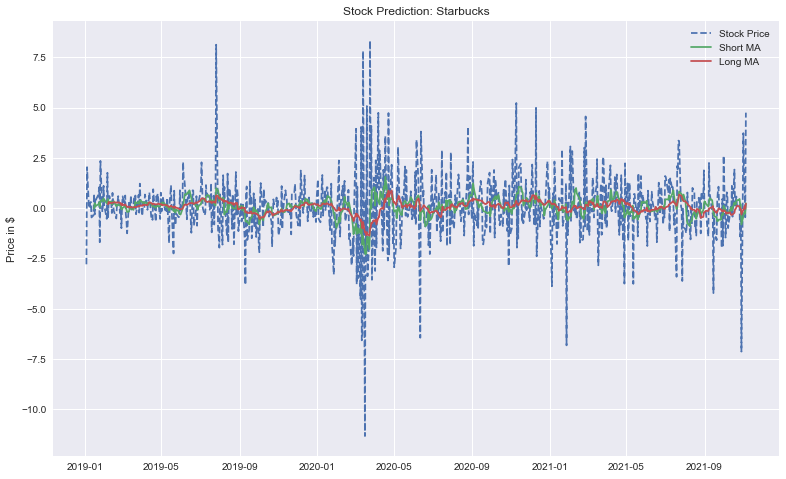

In [46]:
# starbucks moving average
short_moving_average_sbux = diff_train_sbux.rolling(window = 9).mean() # moving average with short window
long_moving_average_sbux = diff_train_sbux.rolling(window = 24).mean() # moving average with long window

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(diff_train_sbux.loc[start:end].index, diff_train_sbux.loc[start:end],
       label = 'Stock Price', linestyle = '--') # line plot of first differenced Apple stock prices
ax.plot(short_moving_average_sbux.loc[start:end].index, short_moving_average_sbux.loc[start:end],
       label = 'Short MA', linestyle = 'solid') # visualization for short ma
ax.plot(long_moving_average_sbux.loc[start:end].index, long_moving_average_sbux.loc[start:end],
       label = 'Long MA', linestyle = 'solid') # visualization for long ma
ax.legend(loc = 'best')
ax.set_ylabel('Price in $')
ax.set_title('Stock Prediction: Starbucks')
plt.show()

## Autoregressive Model

In [80]:
from statsmodels.tsa.ar_model import AutoReg
ar_aapl = AutoReg(diff_train_aapl.values, lags = 29)
ar_fitted_aapl = ar_aapl.fit() # fitting data with AR model

In [81]:
# Predicting stock prices
# Apple
ar_predictions_aapl = ar_fitted_aapl.predict(start = len(diff_train_aapl), end = len(diff_train_aapl)
                                            + len(diff_test_aapl) - 1, dynamic = False)

In [82]:
# comparing predicted and actual observations
for i in range(len(ar_predictions_aapl)):
    print('==' * 25)
    print('predicted values:{:.4f} & actual values:{:.4f}'.format(ar_predictions_aapl[i], diff_test_aapl[i]))

predicted values:0.0222 & actual values:-0.8400
predicted values:0.6280 & actual values:0.3700
predicted values:0.1295 & actual values:-2.8900
predicted values:0.1482 & actual values:-0.0500
predicted values:0.0818 & actual values:2.1200
predicted values:0.2704 & actual values:0.0100
predicted values:-0.0395 & actual values:1.0000
predicted values:0.0986 & actual values:2.4900
predicted values:-0.2615 & actual values:4.3800
predicted values:-0.0656 & actual values:2.6800
predicted values:-0.4706 & actual values:0.4700
predicted values:0.3963 & actual values:0.3900
predicted values:0.0436 & actual values:0.5300
predicted values:-0.0131 & actual values:-5.1300
predicted values:0.4992 & actual values:3.4300
predicted values:0.3405 & actual values:5.0600
predicted values:0.0584 & actual values:-0.5300
predicted values:-0.1643 & actual values:-1.0100
predicted values:0.2746 & actual values:-1.9200
predicted values:0.0204 & actual values:3.4800
predicted values:0.5711 & actual values:5.8600


In [83]:
ar_predictions_aapl = pd.DataFrame(ar_predictions_aapl)
ar_predictions_aapl.index = diff_test_aapl.index # assigning test data indices to predicted values

In [84]:
# Microsoft
ar_msft = AutoReg(diff_train_msft.values, lags = 26)
ar_fitted_msft = ar_msft.fit() 

ar_predictions_msft = ar_fitted_msft.predict(start = len(diff_train_msft),
                                                      end = len(diff_train_msft)
                                                      + len(diff_test_msft) - 1,
                                                      dynamic = False) 

ar_predictions_msft = pd.DataFrame(ar_predictions_msft)
ar_predictions_msft.index = diff_test_msft.index 

In [85]:
# Tesla
ar_tsla = AutoReg(diff_train_tsla.values, lags = 24)
ar_fitted_tsla = ar_tsla.fit() 

ar_predictions_tsla = ar_fitted_tsla.predict(start = len(diff_train_tsla),
                                                      end = len(diff_train_tsla)
                                                      + len(diff_test_tsla) - 1,
                                                      dynamic = False) 

ar_predictions_tsla = pd.DataFrame(ar_predictions_tsla)
ar_predictions_tsla.index = diff_test_tsla.index 

In [86]:
# Starbucks
ar_sbux = AutoReg(diff_train_sbux.values, lags = 27)
ar_fitted_sbux = ar_sbux.fit() 

ar_predictions_sbux = ar_fitted_sbux.predict(start = len(diff_train_sbux),
                                                      end = len(diff_train_sbux)
                                                      + len(diff_test_sbux) - 1,
                                                      dynamic = False) 

ar_predictions_sbux = pd.DataFrame(ar_predictions_sbux)
ar_predictions_sbux.index = diff_test_sbux.index 

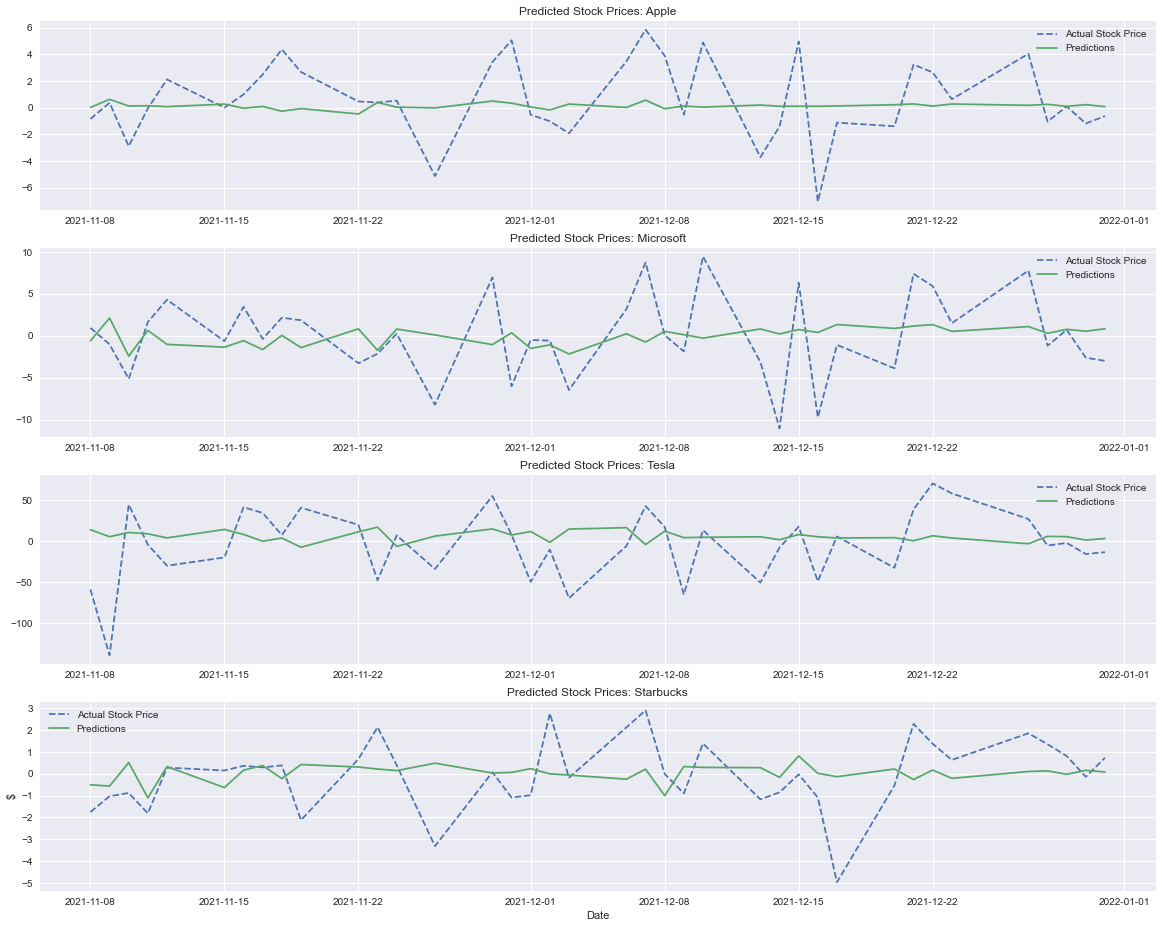

In [87]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (20, 16))

ax1.plot(diff_test_aapl, label = 'Actual Stock Price', linestyle = '--')
ax1.plot(ar_predictions_aapl, label = 'Predictions', linestyle = 'solid')
ax1.set_title('Predicted Stock Prices: Apple')
ax1.legend(loc = 'best')

ax2.plot(diff_test_msft, label = 'Actual Stock Price', linestyle = '--')
ax2.plot(ar_predictions_msft, label = 'Predictions', linestyle = 'solid')
ax2.set_title('Predicted Stock Prices: Microsoft')
ax2.legend(loc = 'best')

ax3.plot(diff_test_tsla, label = 'Actual Stock Price', linestyle = '--')
ax3.plot(ar_predictions_tsla, label = 'Predictions', linestyle = 'solid')
ax3.set_title('Predicted Stock Prices: Tesla')
ax3.legend(loc = 'best')

ax4.plot(diff_test_sbux, label = 'Actual Stock Price', linestyle = '--')
ax4.plot(ar_predictions_sbux, label = 'Predictions', linestyle = 'solid')
ax4.set_title('Predicted Stock Prices: Starbucks')
ax4.legend(loc = 'best')

plt.xlabel('Date')
plt.ylabel('$')
plt.show()

## Autoregressive Integrated Moving Average Model

In [113]:
ticker = ['AAPL', 'MSFT', 'TSLA', 'SBUX']
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 1, 1)
# Retrrieving monthly closing stock prices
stock_prices = yf.download(ticker, start, end, interval = '1d').Close

[*********************100%***********************]  4 of 4 completed


In [114]:
stock_prices = stock_prices.dropna()
for i in ticker:
    stat_test = adfuller(stock_prices[i])[0:2]
    print("The ADF test statistic and p-value of {} are {}".format(i, stat_test))

The ADF test statistic and p-value of AAPL are (-0.2547420563265275, 0.9316741221241511)
The ADF test statistic and p-value of MSFT are (-0.15786696865105287, 0.9433609503696087)
The ADF test statistic and p-value of TSLA are (-0.6325312312934934, 0.8634605906402977)
The ADF test statistic and p-value of SBUX are (-0.6749705361324104, 0.8531266565567086)


In [115]:
from statsmodels.tsa.arima.model import ARIMA

split = int(len(stock_prices['AAPL'].values) * 0.95)
train_aapl = stock_prices['AAPL'].iloc[:split]
test_aapl = stock_prices['AAPL'].iloc[split:]

train_msft = stock_prices['MSFT'].iloc[:split]
test_msft = stock_prices['MSFT'].iloc[split:]

train_tsla = stock_prices['TSLA'].iloc[:split]
test_tsla = stock_prices['TSLA'].iloc[split:]

train_sbux = stock_prices['SBUX'].iloc[:split]
test_sbux = stock_prices['SBUX'].iloc[split:]

In [116]:
# Configuring and fitting ARIMA model

arima_aapl = ARIMA(train_aapl, order = (9, 1, 9))
arima_fit_aapl = arima_aapl.fit()

arima_msft = ARIMA(train_msft, order = (7, 1, 7))
arima_fit_msft = arima_msft.fit()

arima_tsla = ARIMA(train_tsla, order = (9, 1, 9))
arima_fit_tsla = arima_tsla.fit()

arima_sbux = ARIMA(train_sbux, order = (7, 1, 7))
arima_fit_sbux = arima_sbux.fit()

In [117]:
# Predicting stock prices with ARIMA

arima_predict_aapl = arima_fit_aapl.predict(start = len(train_aapl), end = len(train_aapl) + len(test_aapl) - 1,
                                           dynamic = False)

arima_predict_msft = arima_fit_msft.predict(start = len(train_msft), end = len(train_msft) + len(test_msft) - 1,
                                           dynamic = False)

arima_predict_tsla = arima_fit_tsla.predict(start = len(train_tsla), end = len(train_tsla) + len(test_tsla) - 1,
                                           dynamic = False)

arima_predict_sbux = arima_fit_sbux.predict(start = len(train_sbux), end = len(train_sbux) + len(test_sbux) - 1,
                                           dynamic = False)

In [118]:
# Forming index for predictions

arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = test_aapl.index

arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = test_msft.index

arima_predict_tsla = pd.DataFrame(arima_predict_tsla)
arima_predict_tsla.index = test_tsla.index

arima_predict_sbux = pd.DataFrame(arima_predict_sbux)
arima_predict_sbux.index = test_sbux.index

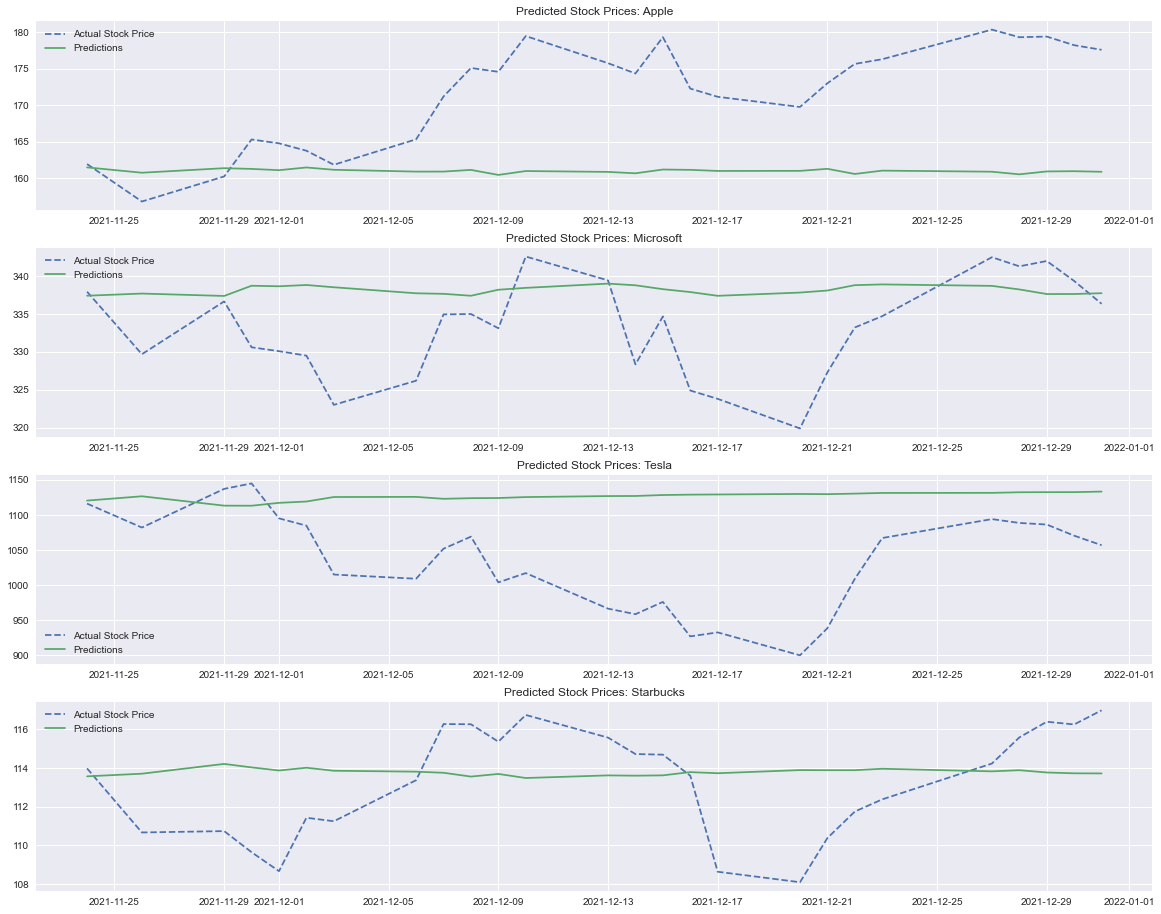

In [119]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (20, 16))

ax1.plot(test_aapl, label = 'Actual Stock Price', linestyle = '--')
ax1.plot(arima_predict_aapl, label = 'Predictions', linestyle = 'solid')
ax1.set_title('Predicted Stock Prices: Apple')
ax1.legend(loc = 'best')

ax2.plot(test_msft, label = 'Actual Stock Price', linestyle = '--')
ax2.plot(arima_predict_msft, label = 'Predictions', linestyle = 'solid')
ax2.set_title('Predicted Stock Prices: Microsoft')
ax2.legend(loc = 'best')

ax3.plot(test_tsla, label = 'Actual Stock Price', linestyle = '--')
ax3.plot(arima_predict_tsla, label = 'Predictions', linestyle = 'solid')
ax3.set_title('Predicted Stock Prices: Tesla')
ax3.legend(loc = 'best')

ax4.plot(test_sbux, label = 'Actual Stock Price', linestyle = '--')
ax4.plot(arima_predict_sbux, label = 'Predictions', linestyle = 'solid')
ax4.set_title('Predicted Stock Prices: Starbucks')
ax4.legend(loc = 'best')

plt.show()

In [62]:
import itertools

p = q = range(0, 9) # defining a range for AR and MA orders
d = range(0,3) #
pdq = list(itertools.product(p, d, q))
arima_results_aapl = []
for param_set in pdq:
    try:
        arima_aapl = ARIMA(train_aapl, order = param_set)
        arima_fitted_aapl = arima_aapl.fit()
        arima_results_aapl.append(arima_fitted_aapl.aic)
    except:
        continue
print('**' * 25)
print('The Lowest AIC score is '
      + '{:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arima_results_aapl).where(pd.DataFrame(arima_results_aapl).T.notnull().all()).min()[0],
            pdq[arima_results_aapl.index(min(arima_results_aapl))]))
    

**************************************************
The Lowest AIC score is 20.0000 and the corresponding parameters are (3, 0, 5)


In [120]:
arima_aapl_tuned = ARIMA(train_aapl, order = (3, 1, 5))
arima_fit_aapl_tuned = arima_aapl_tuned.fit()

In [64]:
import itertools

p = q = range(0, 7) # defining a range for AR and MA orders
d = range(0,3) #
pdq = list(itertools.product(p, d, q))
arima_results_msft = []
for param_set in pdq:
    try:
        arima_msft = ARIMA(train_msft, order = param_set)
        arima_fitted_msft = arima_msft.fit()
        arima_results_msft.append(arima_fitted_msft.aic)
    except:
        continue
print('**' * 25)
print('The Lowest AIC score is '
      + '{:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arima_results_msft).where(pd.DataFrame(arima_results_msft).T.notnull().all()).min()[0],
            pdq[arima_results_msft.index(min(arima_results_msft))]))
    

**************************************************
The Lowest AIC score is 3785.2213 and the corresponding parameters are (4, 1, 4)


In [121]:
arima_msft_tuned = ARIMA(train_msft, order = (4, 1, 4))
arima_fit_msft_tuned = arima_msft_tuned.fit()

In [67]:
import itertools

p = q = range(0, 9) # defining a range for AR and MA orders
d = range(0,3) #
pdq = list(itertools.product(p, d, q))
arima_results_tsla = []
for param_set in pdq:
    try:
        arima_tsla = ARIMA(train_tsla, order = param_set)
        arima_fitted_tsla = arima_tsla.fit()
        arima_results_tsla.append(arima_fitted_tsla.aic)
    except:
        continue
print('**' * 25)
print('The Lowest AIC score is '
      + '{:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arima_results_tsla).where(pd.DataFrame(arima_results_tsla).T.notnull().all()).min()[0],
            pdq[arima_results_tsla.index(min(arima_results_tsla))]))
    

**************************************************
The Lowest AIC score is 6047.0557 and the corresponding parameters are (3, 1, 5)


In [122]:
arima_tsla_tuned = ARIMA(train_tsla, order = (3, 1, 5))
arima_fit_tsla_tuned = arima_tsla_tuned.fit()

In [69]:
import itertools

p = q = range(0, 7) # defining a range for AR and MA orders
d = range(0,3) #
pdq = list(itertools.product(p, d, q))
arima_results_sbux = []
for param_set in pdq:
    try:
        arima_sbux = ARIMA(train_sbux, order = param_set)
        arima_fitted_sbux = arima_sbux.fit()
        arima_results_sbux.append(arima_fitted_sbux.aic)
    except:
        continue
print('**' * 25)
print('The Lowest AIC score is '
      + '{:.4f} and the corresponding parameters are {}'.format(pd.DataFrame(arima_results_sbux).where(pd.DataFrame(arima_results_sbux).T.notnull().all()).min()[0],
            pdq[arima_results_sbux.index(min(arima_results_sbux))]))
    

**************************************************
The Lowest AIC score is 2688.7517 and the corresponding parameters are (2, 1, 6)


In [123]:
arima_sbux_tuned = ARIMA(train_tsla, order = (2, 1, 6))
arima_fit_sbux_tuned = arima_sbux_tuned.fit()

In [124]:
arima_predict_aapl_tuned = arima_fit_aapl_tuned.predict(start = len(train_aapl), end = len(train_aapl) 
                                                        + len(test_aapl) - 1, dynamic = False)

arima_predict_msft_tuned = arima_fit_msft_tuned.predict(start = len(train_msft), end = len(train_msft) 
                                                        + len(test_msft) - 1, dynamic = False)

arima_predict_tsla_tuned = arima_fit_tsla_tuned.predict(start = len(train_tsla), end = len(train_tsla) 
                                                        + len(test_tsla) - 1, dynamic = False)

arima_predict_sbux_tuned = arima_fit_sbux_tuned.predict(start = len(train_sbux), end = len(train_sbux) 
                                                        + len(test_sbux) - 1, dynamic = False)

In [128]:
arima_predict_aapl_tuned = pd.DataFrame(arima_predict_aapl_tuned)
arima_predict_aapl_tuned.index = test_aapl.index

arima_predict_msft_tuned = pd.DataFrame(arima_predict_msft_tuned)
arima_predict_msft_tuned.index = test_msft.index

arima_predict_tsla_tuned = pd.DataFrame(arima_predict_tsla_tuned)
arima_predict_tsla_tuned.index = test_tsla.index

arima_predict_sbux_tuned = pd.DataFrame(arima_predict_sbux_tuned)
arima_predict_sbux_tuned.index = test_sbux.index

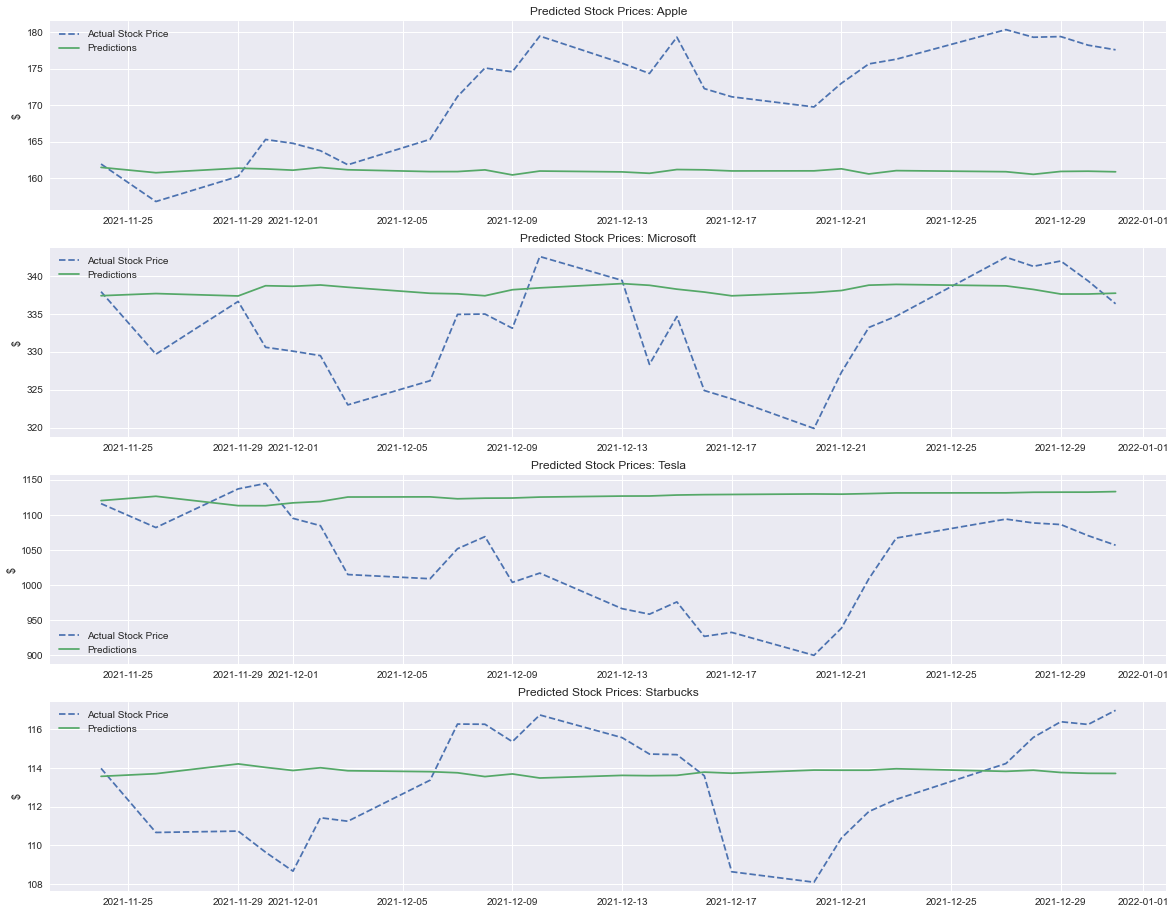

In [129]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (20, 16))

ax1.plot(test_aapl, label = 'Actual Stock Price', linestyle = '--')
ax1.plot(arima_predict_aapl_tuned, label = 'Predictions', linestyle = 'solid')
ax1.set_title('Predicted Stock Prices: Apple')
ax1.legend(loc = 'best')
ax1.set(ylabel = '$')

ax2.plot(test_msft, label = 'Actual Stock Price', linestyle = '--')
ax2.plot(arima_predict_msft_tuned, label = 'Predictions', linestyle = 'solid')
ax2.set_title('Predicted Stock Prices: Microsoft')
ax2.legend(loc = 'best')
ax2.set(ylabel = '$')

ax3.plot(test_tsla, label = 'Actual Stock Price', linestyle = '--')
ax3.plot(arima_predict_tsla_tuned, label = 'Predictions', linestyle = 'solid')
ax3.set_title('Predicted Stock Prices: Tesla')
ax3.legend(loc = 'best')
ax3.set(ylabel = '$')

ax4.plot(test_sbux, label = 'Actual Stock Price', linestyle = '--')
ax4.plot(arima_predict_sbux_tuned, label = 'Predictions', linestyle = 'solid')
ax4.set_title('Predicted Stock Prices: Starbucks')
ax4.legend(loc = 'best')
ax4.set(ylabel = '$')

plt.show()